In [285]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
from sklearn.model_selection import train_test_split

In [9]:
path =  './datasets/movielens'

In [10]:
os.listdir(path)

['links.csv',
 'tags.csv',
 'ratings.csv',
 'README.txt',
 '.ipynb_checkpoints',
 'movies.csv']

## ratings

In [79]:
ratings_df = pd.read_csv(os.path.join(path,"ratings.csv"),encoding='utf-8')

In [290]:
ratings_df.describe()

,userId,movieId,rating
count,100836.000000,100836.000000,100836.000000
mean,326.127564,19435.295718,3.501557
std,182.618491,35530.987199,1.042529
min,1.000000,1.000000,0.500000
25%,177.000000,1199.000000,3.000000
50%,325.000000,2991.000000,3.500000
75%,477.000000,8122.000000,4.000000
max,610.000000,193609.000000,5.000000


In [289]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   userId   100836 non-null  int64  
 1   movieId  100836 non-null  int64  
 2   rating   100836 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 2.3 MB


In [80]:
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [223]:
ratings_df.drop('timestamp',inplace=True,axis=1)

In [224]:
ratings_df.head()

,userId,movieId,rating
0,1,1,4.0
1,1,3,4.0
2,1,6,4.0
3,1,47,5.0
4,1,50,5.0


## movies

In [186]:
movies_df = pd.read_csv(os.path.join(path,"movies.csv"),encoding='utf-8',index_col= 'movieId')

In [292]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   movieId             9742 non-null   int64 
 1   (no genres listed)  9742 non-null   int64 
 2   Action              9742 non-null   int64 
 3   Adventure           9742 non-null   int64 
 4   Animation           9742 non-null   int64 
 5   Children            9742 non-null   int64 
 6   Comedy              9742 non-null   int64 
 7   Crime               9742 non-null   int64 
 8   Documentary         9742 non-null   int64 
 9   Drama               9742 non-null   int64 
 10  Fantasy             9742 non-null   int64 
 11  Film-Noir           9742 non-null   int64 
 12  Horror              9742 non-null   int64 
 13  IMAX                9742 non-null   int64 
 14  Musical             9742 non-null   int64 
 15  Mystery             9742 non-null   int64 
 16  Romance             9742

In [293]:
movies_df.describe()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,...,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,42200.353623,0.003490,0.187641,0.129645,0.062718,0.068158,0.385547,0.123075,0.045165,0.447649,...,0.008930,0.100390,0.016218,0.034285,0.058817,0.163827,0.100595,0.194416,0.039212,0.017142
std,52160.494854,0.058976,0.390445,0.335930,0.242468,0.252031,0.486749,0.328541,0.207677,0.497277,...,0.094083,0.300535,0.126321,0.181968,0.235295,0.370137,0.300808,0.395771,0.194108,0.129808
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3248.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,76232.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,193609.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [187]:
movies_df

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy
...,...,...
193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
193585,Flint (2017),Drama


In [188]:
movies_df.shape

(9742, 2)

In [189]:
movies_df.isna().sum()

title     0
genres    0
dtype: int64

### movies-genre

In [190]:
genre_df =  movies_df['genres'].str.get_dummies(sep='|')

In [193]:
movies_df = pd.concat([movies_df, genre_df],axis=1)

In [196]:
movies_df.drop("genres",inplace=True,axis=1)

In [197]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### movies_year

In [212]:
movies_df['year'] = movies_df["title"].str.extract('(\(\d{4}\))')

<AxesSubplot:>

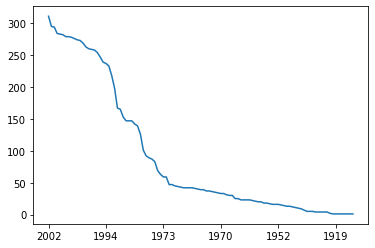

In [345]:
movies_df['year'].value_counts().plot()

In [228]:
movies_df.head()

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [215]:
movies_df['year']=movies_df['year'].apply(lambda x: str(x).replace('(','').replace(')',""))

In [216]:
movies_df.head()

,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [218]:
movies_df.drop('title',axis=1,inplace=True)

In [219]:
movies_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
movieId,,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
2,0,0,1,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1995
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
4,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1995
5,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
193583,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
193585,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,2017


In [226]:
movies_df = movies_df.reset_index()

In [227]:
movies_df

,movieId,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
1,2,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,3,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1995
3,4,0,0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,1995
4,5,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,0,1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
9738,193583,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,2017
9739,193585,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,2017
9740,193587,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2018


In [231]:
ratings_df.shape

(100836, 3)

In [232]:
movies_df.shape

(9742, 22)

In [305]:
feature_vector = pd.merge(ratings_df,movies_df,how ="inner",on="movieId")

In [306]:
feature_vector

,userId,movieId,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,...,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year
0,1,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
1,5,1,4.0,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
2,7,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
3,15,1,2.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
4,17,1,4.5,0,0,1,1,1,1,0,...,0,0,0,0,0,0,0,0,0,1995
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,160341,2.5,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1997
100832,610,160527,4.5,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1971
100833,610,160836,3.0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,2005
100834,610,163937,3.5,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,2016


In [307]:
user_onehot = pd.get_dummies(feature_vector['userId'], prefix='user')

In [308]:
user_onehot.shape

(100836, 610)

In [309]:
item_onehot = pd.get_dummies(feature_vector['movieId'],prefix = 'movie')

In [310]:
item_onehot.shape

(100836, 9724)

In [324]:
concat_feature_vector = pd.concat([feature_vector,user_onehot,item_onehot],axis=1).drop("userId",axis=1).drop("movieId",axis=1)

## final feature vector

```
user onehot 610 + item onehot 9724 + genres_df 20 + year 1 +rating 1 
== 10356
```

In [325]:
610 + 9724 + 20 + 1 + 1

10356

In [326]:
concat_feature_vector

,rating,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,movie_193565,movie_193567,movie_193571,movie_193573,movie_193579,movie_193581,movie_193583,movie_193585,movie_193587,movie_193609
0,4.0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.0,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.5,0,0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,2.5,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100832,4.5,0,1,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
100833,3.0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
100834,3.5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [327]:
concat_feature_vector['year']=concat_feature_vector['year'].astype('float32')

### target

In [332]:
target_rating = concat_feature_vector["rating"]

In [333]:
target_rating

0         4.0
1         4.0
2         4.5
3         2.5
4         4.5
         ... 
100831    2.5
100832    4.5
100833    3.0
100834    3.5
100835    3.5
Name: rating, Length: 100836, dtype: float64

In [334]:
concat_feature_vector.drop('rating',axis=1,inplace=True)

In [335]:
concat_feature_vector

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,...,movie_193565,movie_193567,movie_193571,movie_193573,movie_193579,movie_193581,movie_193583,movie_193585,movie_193587,movie_193609
0,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100832,0,1,0,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100833,0,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
100834,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [336]:
X_train, X_test , y_train,y_test = train_test_split(concat_feature_vector,target_rating,test_size=0.1)

In [337]:
X_train.shape

(90752, 10355)

In [338]:
X_test.shape

(10084, 10355)